# Simulations numériques de l'étude d'impact - Comparaisons avant et après réforme

L'objectif de ce document est de présenter les effets de la réforme des retraites de E.Macron - E.Philippe par comparaison entre le scénario du COR et le scénario de l'étude d'impact. 

Références : 
* *Projet de loi instituant un système universel de retraite.* - Etude d'impact, 24 janvier 2020
* *Évolutions et perspectives des retraites en France.* Rapport annuel du COR – Juin 2019

In [1]:
from retraites.SimulateurRetraites import SimulateurRetraites
from retraites.EtudeImpact import EtudeImpact
import pylab as pl
import numpy as np

## Hypothèses : conjoncture

Nous considérons ici les hypothèses du COR de Juin 2019.

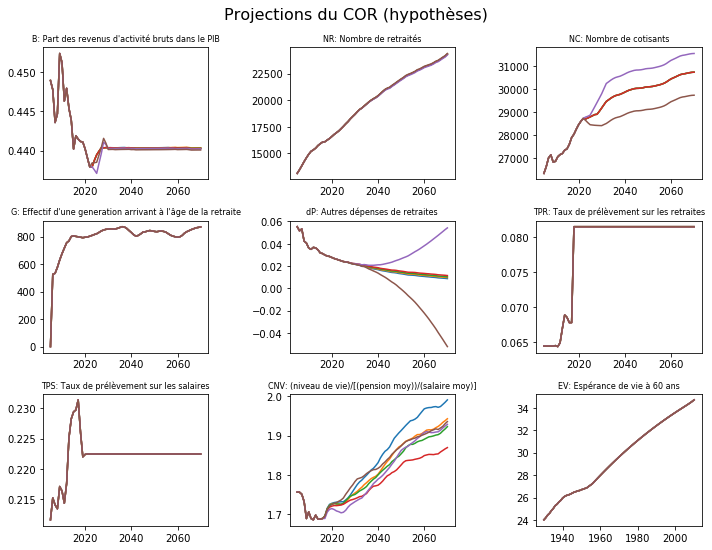

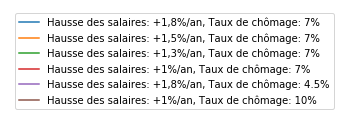

In [2]:
simulateur = SimulateurRetraites()
simulateur.dessineConjoncture()
simulateur.dessineLegende()

## Hypothèses de calcul

Pour la trajectoire de dépenses, nous considérons les mêmes niveaux de dépenses de les dépenses de l'étude d'impact de 2020 à 2050. Pour la période 2050-2070, nous faisons l'hypothèse que le niveau de dépense s'abaisse jusqu'à la moyenne 12,6 % du PIB dans l’UE-15. 

In [3]:
analyse_COR = simulateur.pilotageCOR()

In [4]:
etudeImpact = EtudeImpact(simulateur)
analyse_etudeImpact = etudeImpact.calcule()

In [5]:
# Scénario central : Hausse = +1.3% PIB, chômage 7%
scenario_central = simulateur.scenario_central
scenarios = [scenario_central]
label = simulateur.scenarios_labels[scenario_central]

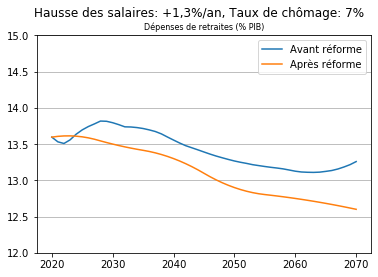

In [6]:
pl.suptitle(label)
analyse_COR.graphique(
    "Depenses",
    dessine_legende=False,
    scenarios_indices=scenarios,
    dessine_annees=simulateur.annees_futures,
)
analyse_etudeImpact.graphique(
    "Depenses",
    dessine_legende=False,
    scenarios_indices=scenarios,
    dessine_annees=simulateur.annees_futures,
)
pl.grid(axis="y")
pl.ylim(bottom=12.0)
pl.legend(["Avant réforme", "Après réforme"])
pl.savefig("../Article4/Simulation-vs-avant-reforme-Depenses.pdf")

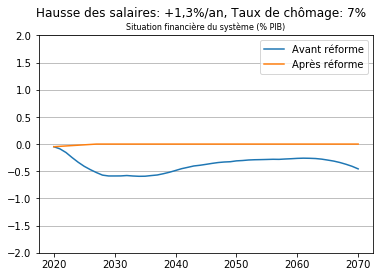

In [7]:
pl.suptitle(label)
analyse_COR.graphique(
    "S",
    dessine_legende=False,
    scenarios_indices=scenarios,
    dessine_annees=simulateur.annees_futures,
)
analyse_etudeImpact.graphique(
    "S",
    dessine_legende=False,
    scenarios_indices=scenarios,
    dessine_annees=simulateur.annees_futures,
)
pl.grid(axis="y")
pl.legend(["Avant réforme", "Après réforme"])
pl.savefig("../Article4/Simulation-vs-avant-reforme-Solde.pdf")

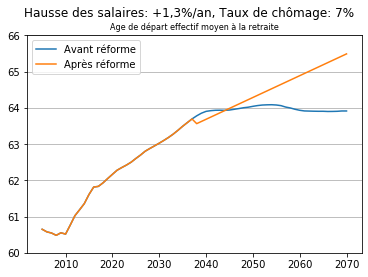

In [8]:
pl.suptitle(label)
analyse_COR.graphique("A", dessine_legende=False, scenarios_indices=scenarios)
analyse_etudeImpact.graphique(
    "A", dessine_legende=False, scenarios_indices=scenarios
)
pl.legend(["Avant réforme", "Après réforme"])
pl.grid(axis="y")
pl.ylim(top=66.0)
pl.savefig("../Article4/Simulation-vs-avant-reforme-Age.pdf")

On observe une discontinuité de l'âge de départ à la retraite en 2038. Celle-ci est compatible avec le graphique 73 page 199 de l'étude d'impact. 

## Niveau des pensions par rapport aux salaires


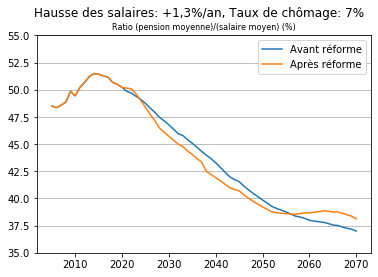

In [9]:
pl.suptitle(label)
analyse_COR.graphique("P", dessine_legende=False, scenarios_indices=scenarios)
analyse_etudeImpact.graphique(
    "P", dessine_legende=False, scenarios_indices=scenarios
)
pl.legend(["Avant réforme", "Après réforme"])
pl.grid(axis="y")
pl.ylim(bottom=35.0)
pl.savefig("../Article4/Simulation-vs-avant-reforme-Pensions.pdf")